# Convolutional Neural Network
## What is a Convolutional Neural Network (CNN)?

#### A Convolutional Neural Network (CNN), also known as ConvNet, is a specialized type of deep learning algorithm mainly designed for tasks that necessitate object recognition, including image classification, detection, and segmentation. CNNs are employed in a variety of practical scenarios, such as autonomous vehicles, security camera systems, and others.


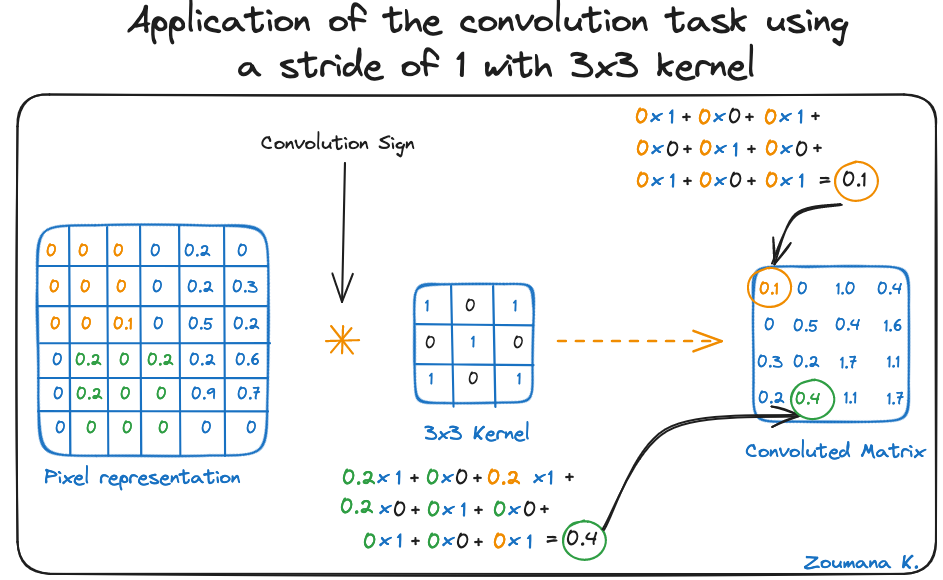<br>
Application of the convolution task using a stride of 1 with 3x3 kernel

Another name associated with the kernel in the literature is feature detector because the weights can be fine-tuned to detect specific features in the input image.

For instance:

    Averaging neighboring pixels kernel can be used to blur the input image.
    Subtracting neighboring kernel is used to perform edge detection.


## Key Components of a CNN
### 1. Convolution layers

This is the first building block of a CNN. As the name suggests, the main mathematical task performed is called convolution, which is the application of a sliding window function to a matrix of pixels representing an image. The sliding function applied to the matrix is called kernel or filter, and both can be used interchangeably.

### 2. Activation function
A ReLU activation function is applied after each convolution operation. This function helps the network learn non-linear relationships between the features in the image, hence making the network more robust for identifying different patterns. It also helps to mitigate the vanishing gradient problems.

### 3. Pooling layer
It is the process of reducing the size of an image. TThe most common aggregation functions that can be applied are:

    Max pooling, which is the maximum value of the feature map
    Sum pooling corresponds to the sum of all the values of the feature map
    Average pooling is the average of all the values.


### 4. Kernal/Filter
A matrix which is smaller than the input, used to transform the input into chunks


### 5. Strides
It is the number of pixels to slide the kernal accross the image

### 6. Padding
Adding pixels of some value, usually with 0.

### 7. Downsampling
It is the act of reducing the size of an img.


## Practical Applications of CNNs
Convolutional Neural Networks have revolutionized the field of computer vision, leading to significant advancements in many real-world applications. Below are a few examples of how they are applied.

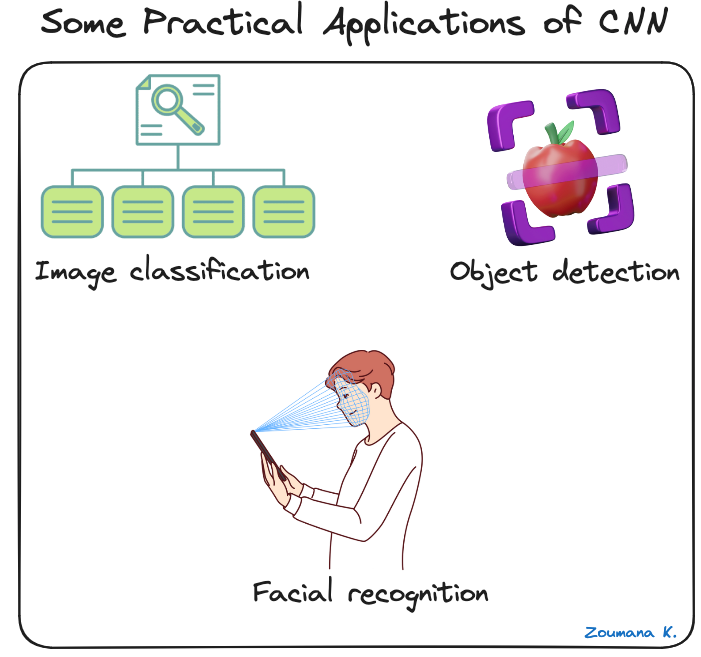


    Image classification: Convolutional neural networks are used for image categorization, where images are assigned to predefined categories. One use of such a scenario is automatic photo organization in social media platforms.

    Object detection: CNNs are able to identify and locate multiple objects within an image. This capability is crucial in multiple scenarios of shelf scanning in retail to identify out-of-stock items.
    
    Facial recognition: this is also one of the main industries of application of CNNs. For instance, this technology can be embedded into security systems for efficient control of access based on facial features.


## Small Image Classification Using Convolutional Neural Network (CNN)


### In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification

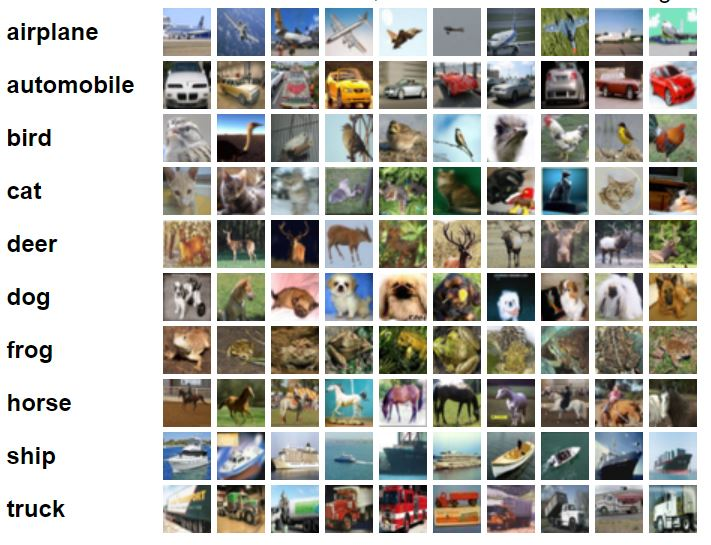

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

2024-06-09 21:43:10.166830: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-09 21:43:10.501337: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-09 21:43:11.830807: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-09 21:43:15.218020: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Load the dataset


In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape


(50000, 1)

## Let's visualize what trainnig features contains


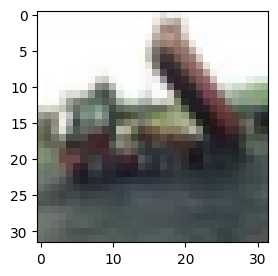

In [6]:
plt.figure(figsize=(12,3))
plt.imshow(X_train[2])

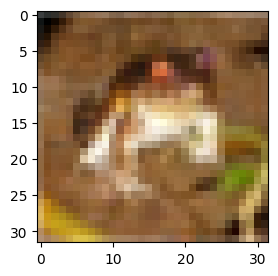

In [7]:
plt.figure(figsize=(12,3))
plt.imshow(X_train[0])

In [8]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

here, 6: frog, 9: truck and so on.

In [9]:
# Reduce the dim of y_train

y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [10]:
y_test = y_test.reshape(-1,)


In [11]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [12]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

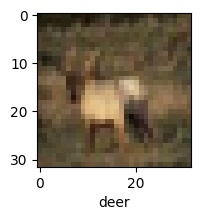

In [13]:
plot_sample(X_train, y_train, 3)

### Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255



In [14]:
# Scaling

X_train = X_train / 255.0
X_test = X_test / 255.0



### Build simple artificial neural network for image classification


In [15]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


ann.fit(X_train, y_train, epochs=5)

/home/jagannath/100OfCode/env/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5


2024-06-09 21:43:27.979307: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 115s 73ms/step - accuracy: 0.3104 - loss: 1.9259
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 112s 72ms/step - accuracy: 0.4184 - loss: 1.6494
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 113s 72ms/step - accuracy: 0.4502 - loss: 1.5513
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 120s 77ms/step - accuracy: 0.4757 - loss: 1.4885
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 120s 76ms/step - accuracy: 0.4962 - loss: 1.4352


You can see that at the end of 5 epochs, accuracy is at around 48%



In [16]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

  4/313 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step  

2024-06-09 21:53:11.658619: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.35      0.47      1000
           1       0.61      0.63      0.62      1000
           2       0.32      0.41      0.36      1000
           3       0.32      0.35      0.34      1000
           4       0.52      0.20      0.29      1000
           5       0.39      0.37      0.38      1000
           6       0.36      0.81      0.50      1000
           7       0.73      0.35      0.47      1000
           8       0.51      0.71      0.59      1000
           9       0.62      0.41      0.50      1000

    accuracy                           0.46     10000
   macro avg       0.51      0.46      0.45     10000
weighted avg       0.51      0.46      0.45     10000



### Now let us build a convolutional neural network to train our images


In [17]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/home/jagannath/100OfCode/env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
cnn.fit(X_train, y_train, epochs=5)


2024-06-09 21:53:22.063688: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 32ms/step - accuracy: 0.3855 - loss: 1.6797
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.5904 - loss: 1.1644
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.6516 - loss: 0.9973
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.6854 - loss: 0.9060
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.7115 - loss: 0.8243


### With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features



In [20]:
cnn.evaluate(X_test,y_test)


2024-06-09 21:56:24.260340: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6948 - loss: 0.9061


[0.9184810519218445, 0.6884999871253967]

In [21]:
y_pred = cnn.predict(X_test)
y_pred[:5]

  9/313 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step  

2024-06-09 21:56:27.036807: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


array([[1.7190427e-02, 7.6094997e-04, 1.0843407e-02, 7.0299464e-01,
        2.1188683e-03, 5.2019671e-02, 4.2926159e-02, 8.2802755e-04,
        1.6287725e-01, 7.4404781e-03],
       [6.7036357e-03, 6.1627090e-02, 1.1402350e-05, 2.9564374e-06,
        2.4842384e-06, 4.1121152e-07, 5.7810031e-08, 9.2497640e-07,
        9.3135232e-01, 2.9868970e-04],
       [7.1506687e-02, 1.9379763e-01, 1.8536459e-03, 4.5009395e-03,
        5.3324094e-03, 1.0792081e-03, 3.8194403e-04, 3.7909194e-03,
        6.8899947e-01, 2.8757086e-02],
       [9.1050524e-01, 4.1573472e-02, 8.0565456e-03, 1.7722745e-03,
        1.8533792e-03, 2.9086773e-04, 2.4473988e-03, 6.3858065e-04,
        3.2698940e-02, 1.6344436e-04],
       [1.5194662e-05, 2.0134265e-05, 2.4464908e-03, 1.0990237e-02,
        8.0878425e-01, 2.0835258e-03, 1.7556179e-01, 5.9950431e-05,
        2.6200196e-05, 1.2135262e-05]], dtype=float32)

In [22]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [23]:
y_test[:5]


array([3, 8, 8, 0, 6], dtype=uint8)

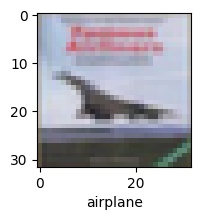

In [24]:
plot_sample(X_test, y_test,3)


In [25]:
classes[y_classes[3]]


'airplane'